# CMSC320 Final Project Checkpoint 2

Group Members: Mohid Basha: 118795980; Musa Waseem: 118849355; Ayush Patel: 118678191;
Karim Abdallah: 118894478; Matthew Wong: 117945782 Yash Mohan: 118953281


# Data preprocessing:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.stats.weightstats as stats

# Loading in Premier League Match Data (1996 - 2023) - "premier-league-matches.csv"

In [ ]:
pl_matches_df = pd.read_csv('premier-league-matches.csv')
pl_matches_df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


In [ ]:
pl_matches_df = pl_matches_df[pl_matches_df['Season_End_Year'] >= 1996]
pl_matches_df.reset_index(drop=True, inplace=True)

In [ ]:
pl_matches_df.isna().sum()

NameError: name 'pl_matches_df' is not defined

In [ ]:
pl_matches_df.groupby('Season_End_Year').describe()

Wk                                                \
                 count  mean        std  min   25%   50%   75%   max   
Season_End_Year                                                        
1996             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
1997             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
1998             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
1999             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2000             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2001             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2002             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2003             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2004             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2005             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2006             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2007             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2008             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2009             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2010             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2011             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2012             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2013             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2014             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2015             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2016             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2017             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2018             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2019             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2020             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2021             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2022             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   
2023             380.0  19.5  10.980313  1.0  10.0  19.5  29.0  38.0   

                HomeGoals            ...           AwayGoals            \
                    count      mean  ...  75%  max     count      mean   
Season_End_Year                      ...                                 
1996                380.0  1.526316  ...  2.0  7.0     380.0  1.073684   
1997                380.0  1.471053  ...  2.0  7.0     380.0  1.081579   
1998                380.0  1.557895  ...  2.0  7.0     380.0  1.123684   
1999                380.0  1.455263  ...  2.0  7.0     380.0  1.068421   
2000                380.0  1.671053  ...  2.0  8.0     380.0  1.118421   
2001                380.0  1.544737  ...  2.0  6.0     380.0  1.065789   
2002                380.0  1.465789  ...  2.0  7.0     380.0  1.168421   
2003                380.0  1.500000  ...  2.0  6.0     380.0  1.131579   
2004                380.0  1.505263  ...  2.0  6.0     380.0  1.157895   
2005                380.0  1.500000  ...  2.0  7.0     380.0  1.065789   
2006                380.0  1.460526  ...  2.0  7.0     380.0  1.023684   
2007                380.0  1.452632  ...  2.0  6.0     380.0  0.997368   
2008                380.0  1.528947  ...  2.0  8.0     380.0  1.107895   
2009                380.0  1.400000  ...  2.0  6.0     380.0  1.078947   
2010                380.0  1.697368  ...  2.0  9.0     380.0  1.073684   
2011                380.0  1.623684  ...  2.0  7.0     380.0  1.173684   
2012                380.0  1.589474  ...  2.0  8.0     380.0  1.215789   
2013                380.0  1.557895  ...  2.0  8.0     380.0  1.239474   
2014                380.0  1.573684  ...  2.0  7.0     380.0  1.194737   
2015                380.0  1.473684  ...  2.0  8.0     380.0  1.092105   
2016                380.0  1.492105  ...  2.0  6.0     380.0  1.207895   
2017       

In [ ]:
pl_matches_df.dtypes

,0
Season_End_Year,int64
Wk,int64
Date,object
Home,object
HomeGoals,int64
AwayGoals,int64
Away,object
FTR,object


In [ ]:
print(len(pl_matches_df))

10640


In [ ]:
print(f"Number of Rows: {pl_matches_df.shape[0]}")
print(f"Number of Features/Columns: {pl_matches_df.shape[1]}")

Number of Rows: 10640
Number of Features/Columns: 8


In [ ]:
pl_matches_df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1996,1,1995-08-19,Wimbledon,3,2,Bolton,H
1,1996,1,1995-08-19,Newcastle Utd,3,0,Coventry City,H
2,1996,1,1995-08-19,Manchester City,1,1,Tottenham,D
3,1996,1,1995-08-19,Aston Villa,3,1,Manchester Utd,H
4,1996,1,1995-08-19,Blackburn,1,0,QPR,H
...,...,...,...,...,...,...,...,...
10635,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
10636,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
10637,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
10638,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


**There are 12026 rows in this dataframe, which spans from 1993-2023. However, after the 1996 season, the number of games played in a season changed. In order to solve this, we dropped the rows that have information from before 1996. There are no NaN values in the table, so did not have to worry about dropping anything else. We will use this dataset in relation with the standings dataset to compare mutliple variables together. **

# Loading in Premier League Standings Data (1996 - 2024) - "pl-tables-1993-2024.csv"

In [ ]:
pl_standings_df = pd.read_csv('pl-tables-1993-2024.csv')
pl_standings_df

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,2024,Brentford,16,38,10,9,19,56,65,-9,39,NaN
642,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32,4-point deduction
643,2024,Luton Town,18,38,6,8,24,52,85,-33,26,Relegated
644,2024,Burnley,19,38,5,9,24,41,78,-37,24,Relegated


In [ ]:
pl_standings_df = pl_standings_df[pl_standings_df['season_end_year'] >= 1996]
pl_standings_df.reset_index(drop=True, inplace=True)
pl_standings_df

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1996,Manchester Utd,1,38,25,7,6,73,35,38,82,→ Champions League via league finish
1,1996,Newcastle Utd,2,38,24,6,8,66,37,29,78,→ UEFA Cup via league finish
2,1996,Liverpool,3,38,20,11,7,70,34,36,71,→ UEFA Cup Winners' Cup via cup win 1
3,1996,Aston Villa,4,38,18,9,11,52,35,17,63,→ UEFA Cup via league finish
4,1996,Arsenal,5,38,17,12,9,49,32,17,63,→ UEFA Cup via league finish 2
...,...,...,...,...,...,...,...,...,...,...,...,...
575,2024,Brentford,16,38,10,9,19,56,65,-9,39,NaN
576,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32,4-point deduction
577,2024,Luton Town,18,38,6,8,24,52,85,-33,26,Relegated
578,2024,Burnley,19,38,5,9,24,41,78,-37,24,Relegated


In [ ]:
pl_standings_df.isna().sum()

,0
season_end_year,0
team,0
position,0
played,0
won,0
drawn,0
lost,0
gf,0
ga,0
gd,0


In [ ]:
pl_standings_df.drop("notes", axis='columns')

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points
0,1996,Manchester Utd,1,38,25,7,6,73,35,38,82
1,1996,Newcastle Utd,2,38,24,6,8,66,37,29,78
2,1996,Liverpool,3,38,20,11,7,70,34,36,71
3,1996,Aston Villa,4,38,18,9,11,52,35,17,63
4,1996,Arsenal,5,38,17,12,9,49,32,17,63
...,...,...,...,...,...,...,...,...,...,...,...
575,2024,Brentford,16,38,10,9,19,56,65,-9,39
576,2024,Nottingham Forest,17,38,9,9,20,49,67,-18,32
577,2024,Luton Town,18,38,6,8,24,52,85,-33,26
578,2024,Burnley,19,38,5,9,24,41,78,-37,24


In [ ]:
print(f"Number of Rows: {pl_standings_df.shape[0]}")
print(f"Number of Features/Columns: {pl_standings_df.shape[1]}")

Number of Rows: 580
Number of Features/Columns: 12


In [ ]:
pl_standings_df.groupby('season_end_year').describe()

position                                              played  \
                   count  mean      std  min   25%   50%    75%   max  count   
season_end_year                                                                
1996                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
1997                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
1998                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
1999                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2000                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2001                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2002                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2003                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2004                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2005                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2006                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2007                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2008                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2009                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2010                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2011                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2012                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2013                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2014                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2015                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2016                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2017                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2018                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2019                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2020                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2021                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2022                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2023                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   
2024                20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0   20.0   

                       ...     gd       points                                 \
                 mean  ...    75%   max  count   mean        std   min    25%   
season_end_year        ...                                                      
1996             38.0  ...  17.00  38.0   20.0  52.10  15.161933  29.0  39.50   
1997             38.0  ...   5.50  33.0   20.0  50.90  12.043343  34.0  41.75   
1998             38.0  ...  10.25  47.0   20.0  52.25  12.430332  33.0  44.00   
1999             38.0  ...   8.50  43.0   20.0  51.25  13.999530  30.0  42.00   
2000             38.0  ...  12.00  52.0   20.0  52.40  16.063689  24.0  42.50   
2001             38.0  ...  16.50  48.0   20.0  51.95  13.971682  26.0  42.00   
2002             38.0  ...  17.50  43.0   20.0  51.95  16.687452  28.0  42.25   
2003             38.0  ...  10.50  43.0   20.0  52.50  15.322842  19.0  46.50   
2004             38.0  ...   7.50  47.0   20.0  51.60  15.177546  33.0  43.25   
2005             38.0  ...   7.25  57.0   20.0  51.50  17.083387  32.0  41.25   
2006             38.0  ...  10.50  50.0   20.0  53.15  18.610340  15.0  42.75   
2007             38.0  ...   7.75  56.0   20.0  52.10  15.850950  28.0  40.50   
2008             38.0  ...  20.50  58.0   20.0  52.00  19.735088  11.0  38.50   
2009             38.0  ...  10.50  50.0   20.0  52.15  18.236098  32.0  39.75   
2010             38.0  ...  26.00  71.0   20.0  51.75  18.873192  19.0  37.50 

In [ ]:
pl_standings_df.dtypes

,0
season_end_year,int64
team,object
position,int64
played,int64
won,int64
drawn,int64
lost,int64
gf,int64
ga,int64
gd,int64


In [ ]:
print(len(pl_standings_df))
print(len(pl_standings_df.drop_duplicates()))

580
580


Similar to the first dataset, there are some uneven values. The number of teams in the league changed from 22 to 20 in 1996, so we only considered the years past this to make it more consistent. After removing these rows, we also found that the notes column was not very helpful for anything, and it had many null values, so we dropped the whole column. This dataset could be used to compare multiple variables from across the three datasets.

# Loading in Premier League Standings Data (1996 - 2024) - "pl-tables-1993-2024.csv"

In [ ]:
df = pd.read_html('https://fbref.com/en/comps/9/2023-2024/shooting/2023-2024-Premier-League-Stats')
df_pl_shooting_2024 = df[0]

df_pl_shooting_2024.to_csv('df_pl_shooting_2024.csv')

df_pl_shooting_2024 = pd.read_csv('df_pl_shooting_2024.csv')
df_pl_shooting_2024.columns = df_pl_shooting_2024.iloc[0]
df_pl_shooting_2024 = df_pl_shooting_2024[1:]
del df_pl_shooting_2024[df_pl_shooting_2024.columns[0]]
df_pl_shooting_2024

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
1,Arsenal,25,38.0,86,647,209,32.3,17.03,5.5,0.12,0.36,15.8,6,10,10,76.1,68.5,0.11,9.9,7.5
2,Aston Villa,31,38.0,72,511,182,35.6,13.45,4.79,0.13,0.37,16.0,15,4,4,63.3,60.3,0.12,8.7,7.7
3,Bournemouth,30,38.0,52,539,175,32.5,14.18,4.61,0.09,0.29,16.7,18,2,3,55.9,53.6,0.1,-3.9,-3.6
4,Brentford,28,38.0,54,470,159,33.8,12.37,4.18,0.11,0.32,15.6,17,3,3,58.2,56.0,0.12,-4.2,-5.0
5,Brighton,30,38.0,50,555,198,35.7,14.61,5.21,0.08,0.23,16.7,11,5,6,56.8,52.2,0.1,-6.8,-7.2
6,Burnley,31,38.0,40,430,137,31.9,11.32,3.61,0.09,0.27,17.7,13,3,3,40.6,38.3,0.09,-0.6,-1.3
7,Chelsea,32,38.0,76,537,194,36.1,14.13,5.11,0.12,0.34,17.3,22,11,12,74.5,65.1,0.12,1.5,-0.1
8,Crystal Palace,26,38.0,56,452,162,35.8,11.89,4.26,0.12,0.32,17.2,20,4,4,48.6,45.4,0.1,7.4,6.6
9,Everton,26,38.0,40,504,152,30.2,13.26,4.0,0.08,0.25,16.7,14,2,3,54.0,51.6,0.11,-14.0,-13.6
10,Fulham,25,38.0,54,499,175,35.1,13.13,4.61,0.1,0.3,17.0,14,2,2,50.8,49.2,0.1,3.2,2.8


In [ ]:
df_pl_shooting_2024.describe()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,20,10,1,17,20,18,18,20,18,8,13,14,14,10,10,20,20,5,20,20
top,Arsenal,25,38.0,54,647,175,32.5,17.03,4.61,0.12,0.32,16.7,11,4,3,76.1,68.5,0.11,9.9,7.5
freq,1,3,20,2,1,2,2,1,2,6,4,4,3,4,4,1,1,7,1,1


In [ ]:
print(f"Number of Rows/Teams: {df_pl_shooting_2024.shape[0]}")
print(f"Number of Features/Columns: {df_pl_shooting_2024.shape[1]}")

Number of Rows/Teams: 20
Number of Features/Columns: 21


We webscraped a dataset from FBREF. We brought the data in as an html and then converted it into a csv for easier access. Since we converted it into a csv, the column names were integrated into the dataset as the first row, so we fixed this by making the first row into the column names.

# Basic Data Exploration and Summary Statistics

Our datasets are primarily all numerical variables (non-categorical) hence this attribute has guided our decision-making in terms of our choices for our analysis techniques.

The goal of the following code is to see if there is a correlation between the shot percentage of a team and their standing at the end of the year.
We will conduct a pearson correlation test to see the relationship between the variables

H0 = There is no relationship between the shooting percentage and the final league position.

Ha = There is a relationship between the shooting percentage and the final league position.

The correlation_coefficient r = 0.572041508881513


Text(0.5, 1.0, 'Position vs Shot Percentage')

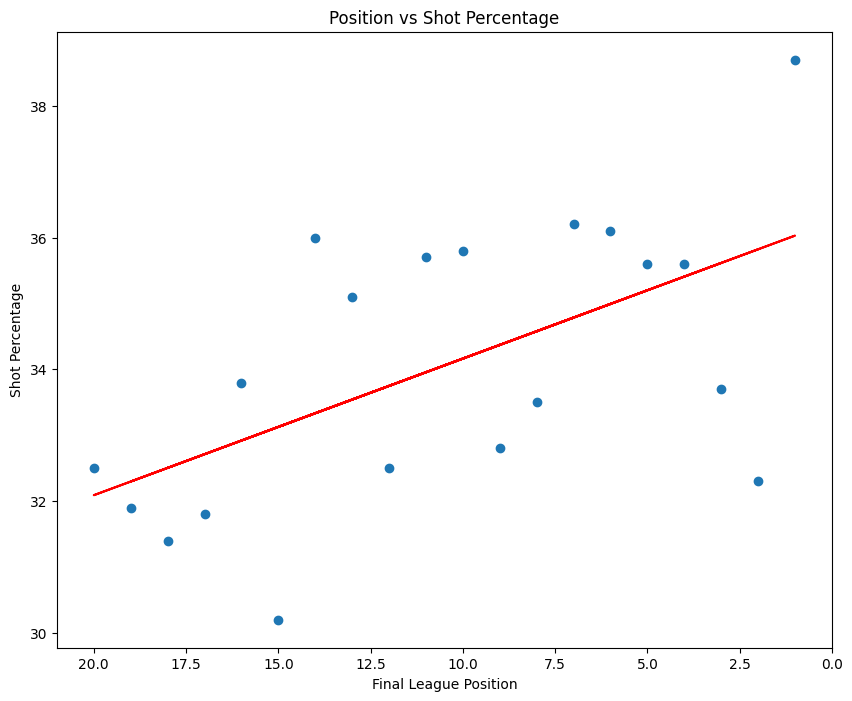

In [ ]:
df_pl_shooting_2024['SoT%'] = df_pl_shooting_2024['SoT%'].astype(float)
shot_percentage = df_pl_shooting_2024['SoT%'].astype(float)


pl_standings_df = pl_standings_df.sort_values('team')
season_end_year_2024 = pl_standings_df[pl_standings_df['season_end_year']==2024]

positions_2024 = season_end_year_2024['position']


correlation_coefficient = np.corrcoef(shot_percentage, positions_2024)[0, 1]
print(f'The correlation_coefficient r = {-correlation_coefficient}')

a, b = np.polyfit(positions_2024, shot_percentage, 1)

plt.figure(figsize = (10, 8))
plt.scatter(positions_2024, shot_percentage)
plt.xlim(max(positions_2024)+1, min(positions_2024)-1)
plt.plot(positions_2024, a*positions_2024 + b, color = 'red')
plt.xlabel('Final League Position')
plt.ylabel('Shot Percentage')
plt.title('Position vs Shot Percentage')


Conclusion: We used np.corrcoef to find the relationship between these two variables. We received a correlation coefficent of .572, meaning that there is a moderate, positive relationship between the total shooting percentage from a team and their rank at the end of the year.

Below we will be conducting a paired t-test with an alpha value of 0.05 using the mean goals and the expected mean goals for the 2023-2024 Premier League season. The dataset of '2023-2024-Premier-League-Stats' contains both of these variables with no null values for each team. We also will display the box plots for each column, demonstrating the min, max, median, and IQR etc.

H0: There is no significant difference between the mean goals and the expected mean goals for the 2023-2024 season.

Ha: There is indeed a significant difference between the mean goals and the expected mean goals for the 2023-2024 season.

TtestResult(statistic=0.6296899151753186, pvalue=0.5363968845560343, df=19)


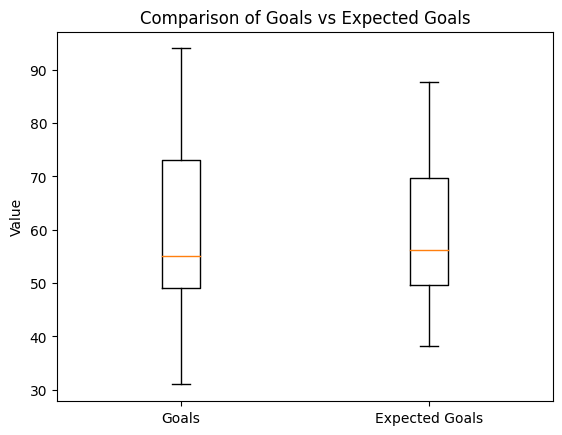

In [ ]:
#run t test for goals vs expected goals to determine if there is a big difference between the means
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

# convert both columns to floats
df_pl_shooting_2024['Gls'] = df_pl_shooting_2024['Gls'].astype(float)
df_pl_shooting_2024['xG'] = df_pl_shooting_2024['xG'].astype(float)

# conduct t test for the goals vs expected goals
print(ttest_rel(df_pl_shooting_2024['Gls'], df_pl_shooting_2024['xG']))


# make boxplot for the two variables
plt.boxplot([df_pl_shooting_2024['Gls'], df_pl_shooting_2024['xG']], labels=['Goals', 'Expected Goals'])
plt.title('Comparison of Goals vs Expected Goals')
plt.ylabel('Value')
plt.show()





Conclusion: After running the t-test, we calculated a p value of approximately 0.536 rounded to three decimal places. Hence, since 0.536 > 0.05, we fail to reject the null hypothesis. Therefore, we can conclude that there is not a statistically significant difference between the mean goals and expected mean goals for the 2023-2024 season.


H0: There is no significant difference between the home goals and away goals (There is no home field advantage).

Ha: There is indeed a significant difference between the home goals and away goals (There is a home field advantage).

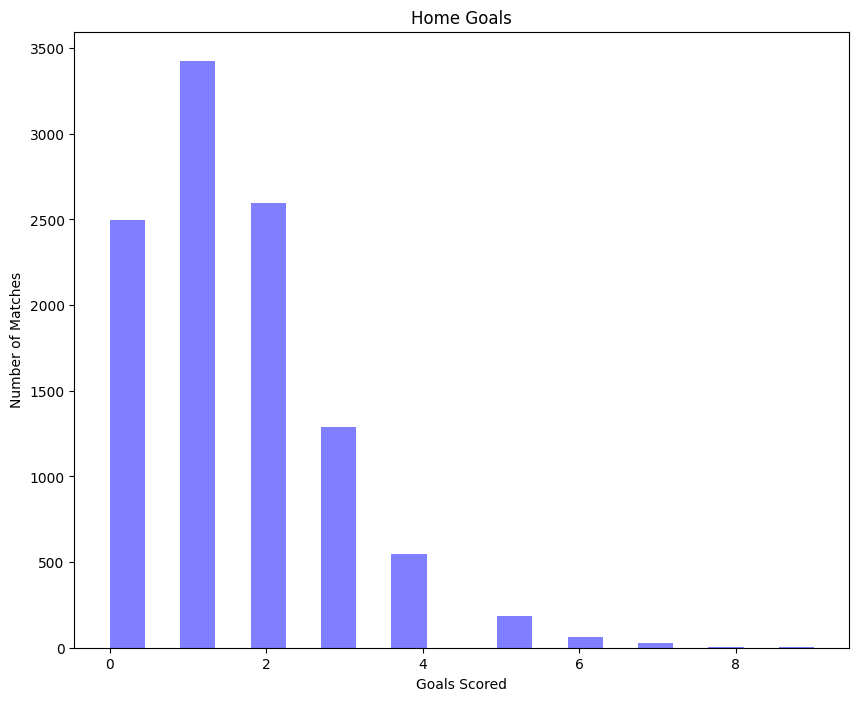

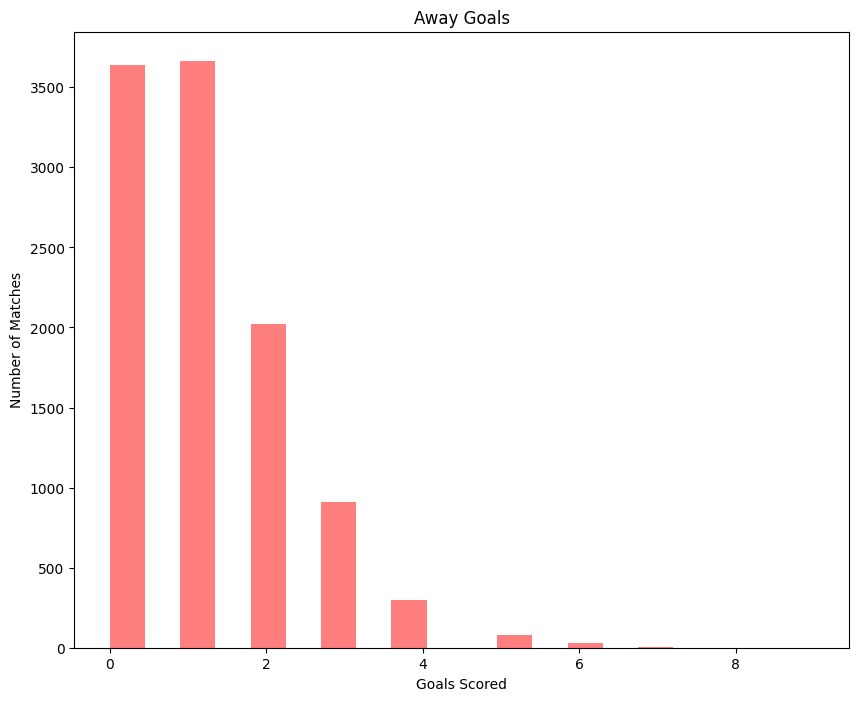

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(pl_matches_df["HomeGoals"],bins=20, alpha=0.5, label='HomeGoals', color='blue')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')
plt.title('Home Goals')
plt.show()

plt.figure(figsize=(10, 8))
plt.hist(pl_matches_df["AwayGoals"],bins=20, alpha=0.5, label='AwayGoals', color='red')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')
plt.title('Away Goals')
plt.show()

In [ ]:
z_score, p_value = stats.ztest(pl_matches_df['HomeGoals'], pl_matches_df['AwayGoals'])
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")


Z-score: 22.534334962515782
P-value: 1.9128860556183869e-112


Conclusion: Although the p value is extremely small, we can still accept it and see that it is less than our alpha value of .05. This means that we reject the null, and accept the alternate hypthesis that there is a difference between the number of home goals and away goals.

